# Data Exploration

In [1]:
# import library
import numpy as np 
import pandas as pd 

## Load Data

In [2]:
# load data
hotel = pd.read_csv('hotel_bookings.csv')
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

## Handling Missing Values

In [3]:
# See the missing Values for Children
hotel[hotel['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [4]:
# replcae the missing values of children with the median value
hotel['children'].fillna(hotel['children'].median(),inplace = True)

# convert the number of children to int
hotel['children'] = hotel['children'].astype(int)

In [5]:
# See the missing Values for country
hotel[hotel['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [6]:
# Groupby customer_type and find the most frequenct country for each customer_type
hotel.groupby('customer_type')['country'].agg(pd.Series.mode)

customer_type
Contract           PRT
Group              PRT
Transient          PRT
Transient-Party    PRT
Name: country, dtype: object

In [7]:
# Replace missing values in "country" with most frequent appeared value for country in each the customer_type 
hotel["country"] = hotel.groupby("customer_type")['country'].transform(lambda x: x.fillna(x.mode()[0]))

In [8]:
# handle missing values in 'agent'
# NaN in 'agent' means the booking is not made by a travel agency
# replace NaN with 0 for the ease of data handling
hotel['agent'].fillna(0,inplace=True)

## Data Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
sns.set(style='darkgrid')

<Figure size 1440x720 with 0 Axes>

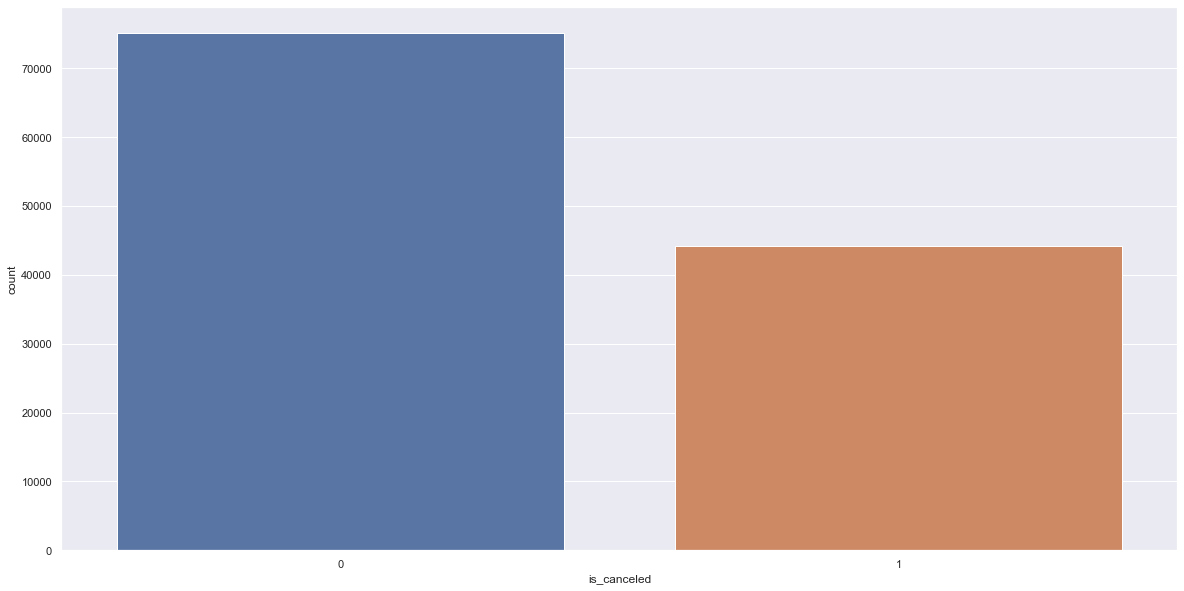

In [10]:
# The label - is_canceled
plt.figure(figsize = (20,10))
sns.countplot(hotel['is_canceled'])

- It seems that the majority of reservations were not canceled

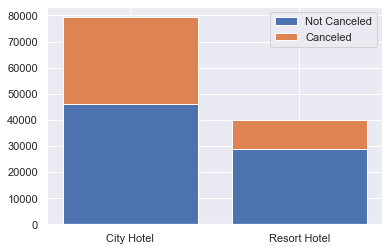

In [11]:
# Stacked Bar chart for hotel
canceled = hotel[hotel.is_canceled==1]['hotel'].value_counts()
not_canceled = hotel[hotel.is_canceled==0]['hotel'].value_counts()

labels = ['City Hotel', 'Resort Hotel']
fig, ax = plt.subplots()
ax.bar(labels, not_canceled, label='Not Canceled')
ax.bar(labels, canceled, bottom=not_canceled, label='Canceled')

ax.legend()
plt.show()

- City Hotel has more bookings (3/4 of bookings), any maybe that's why it has more cancellations.
- City Hotel has more bookings because it is more affordable
#### Resort Hotel is more appropriate for larger group of customers (family with childern)??  -- need to find out the relation.

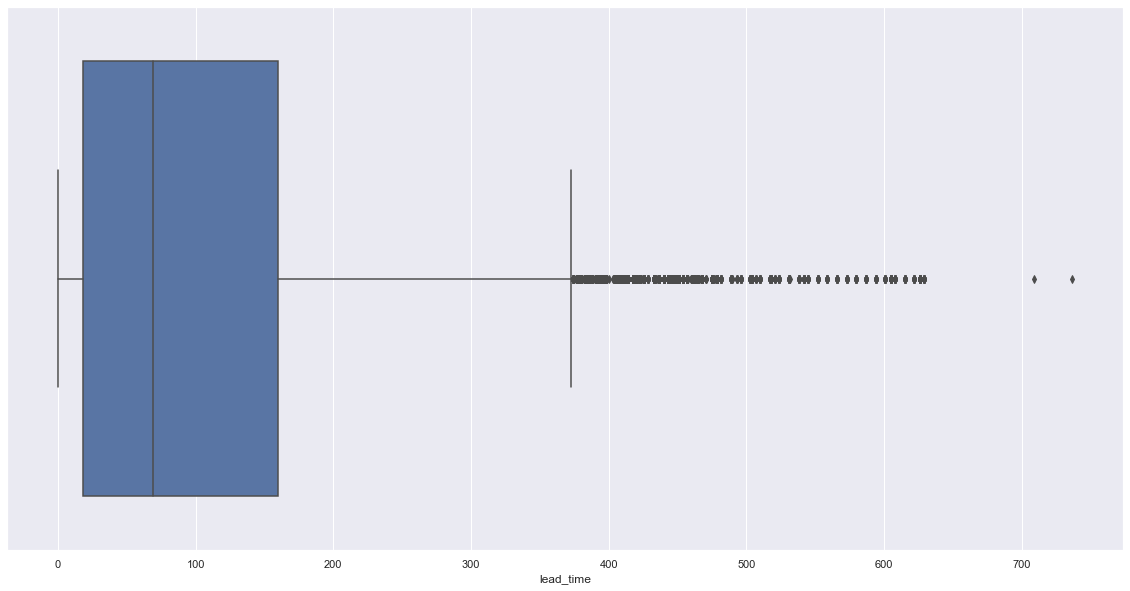

In [12]:
# boxplot for lead time and for lead time
plt.figure(figsize = (20,10))
sns.boxplot(hotel['lead_time'])

- The outliers are those larger than ~370
- The majority are smaller than 200

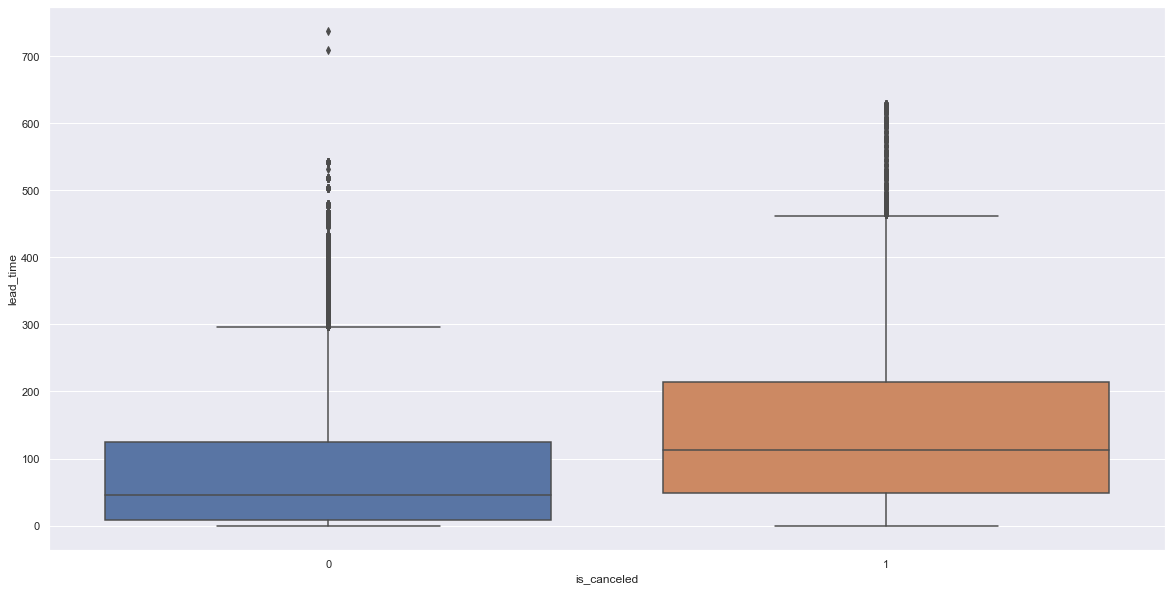

In [13]:
# boxplot for lead time and for lead time reagarding to is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['is_canceled'],y=hotel['lead_time'])

- Bookings tend to be canceled when the lead time is longer

<Figure size 1440x720 with 0 Axes>

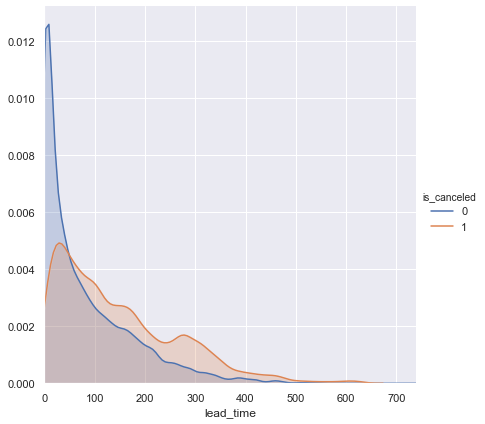

In [14]:
# Density Curve for lead time by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(hotel,hue='is_canceled',height=6,xlim=[0,740]).map(sns.kdeplot,'lead_time',shade=True).add_legend()

- When the lead time is larger than 60, people tend to cancel their bookings

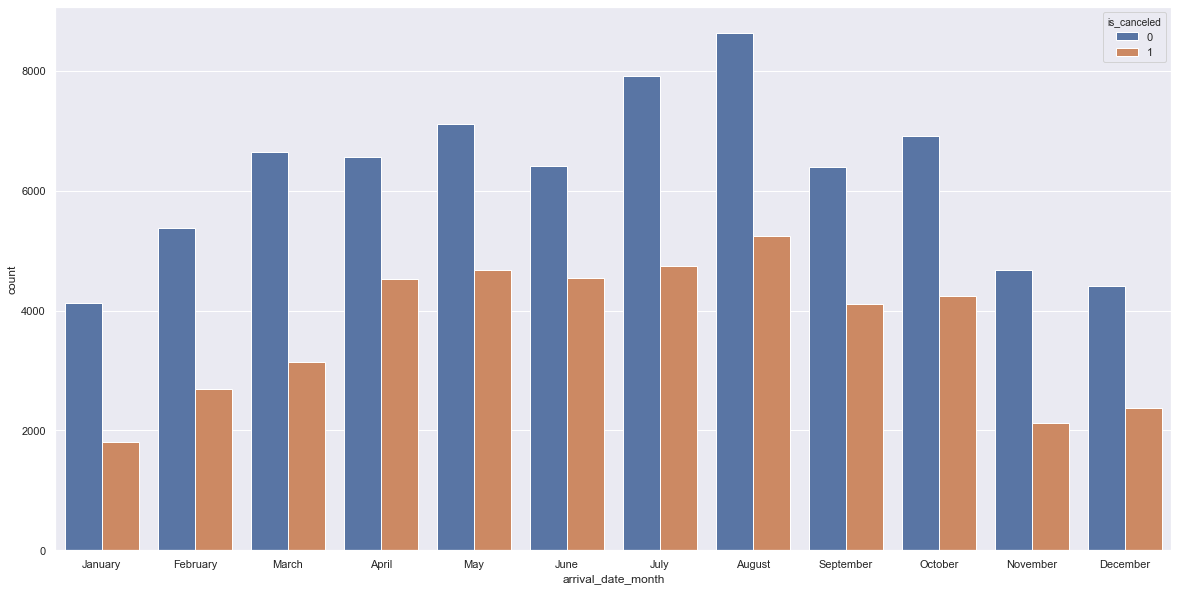

In [15]:
# Bar chart for arrival month
plt.figure(figsize = (20,10))
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
       'August', 'September', 'October', 'November', 'December']
sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel, order=month)

- Increasing more bookings arond the middle of the year (summer period is the peak)

<Figure size 1440x720 with 0 Axes>

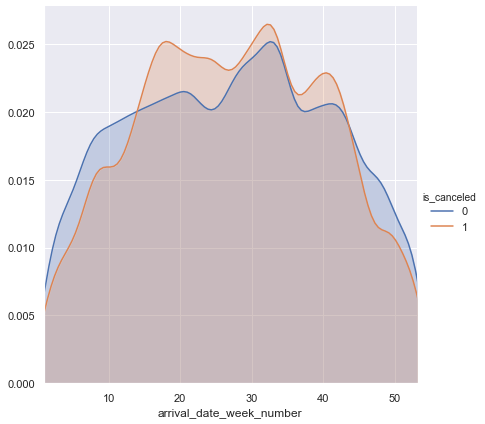

In [16]:
# Density Curve for arrival week number by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(hotel, hue='is_canceled',height=6, xlim=[1,53]).map(sns.kdeplot, 'arrival_date_week_number',shade=True).add_legend()

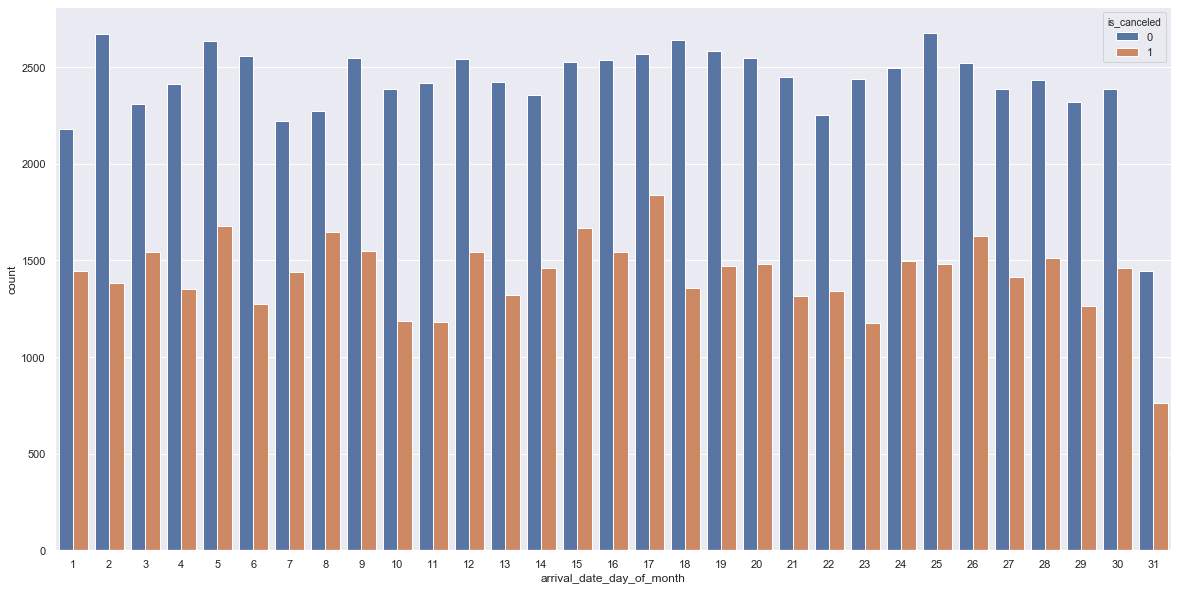

In [17]:
# bar chart for arrival date of month
plt.figure(figsize=(20,10))
sns.countplot(x='arrival_date_day_of_month', hue='is_canceled',data=hotel)

- flucutations for the arrival day of month.

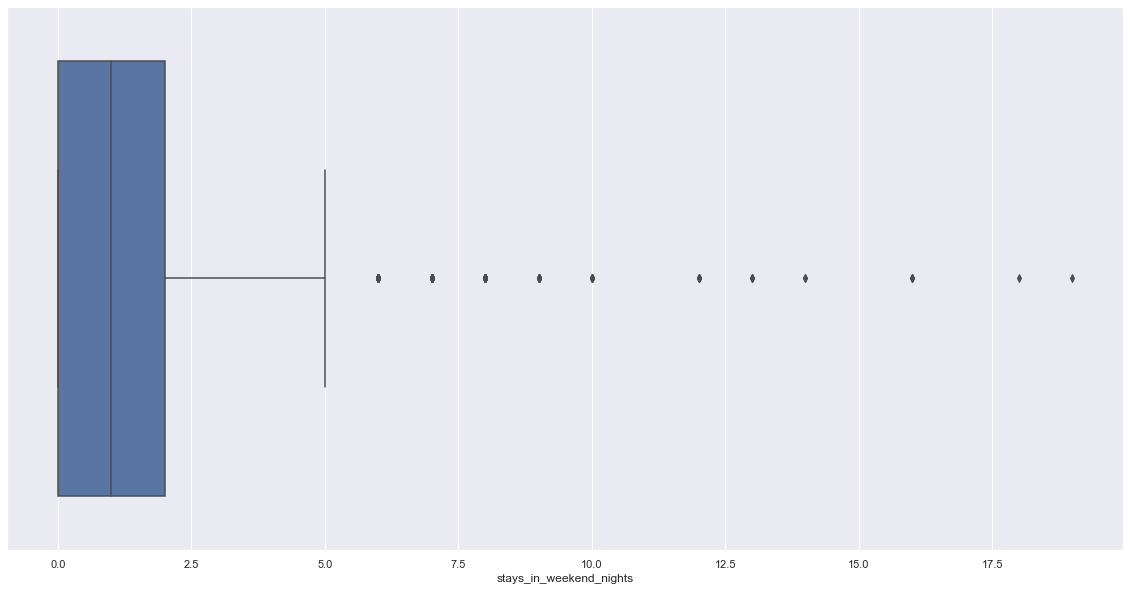

In [18]:
# box plot of stays on weekend nights
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['stays_in_weekend_nights'])

- outlikers are larger than 5
- majority is smaller than 2.5 days (i.e. around one weekend)

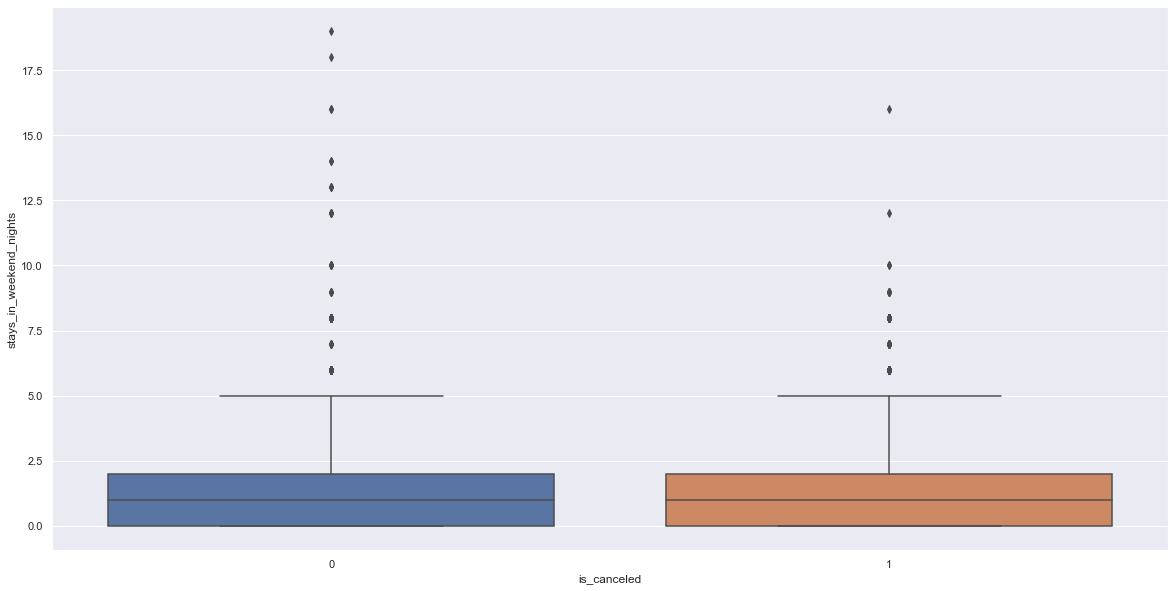

In [19]:
# box plot of stays on weekend nights by is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['is_canceled'],y=hotel['stays_in_weekend_nights'])

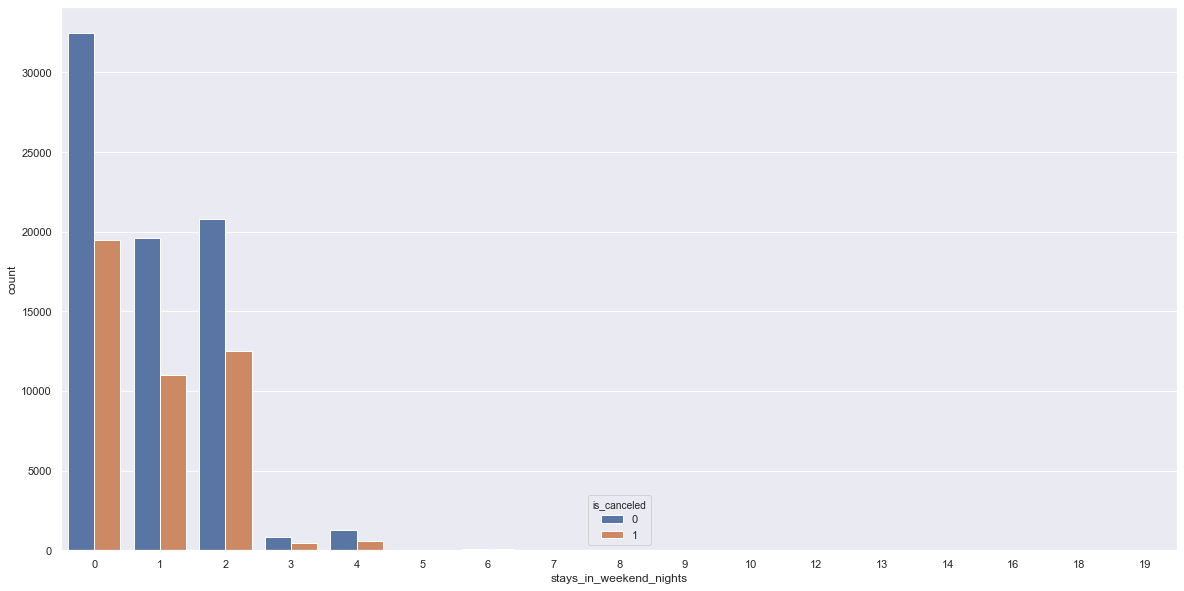

In [20]:
plt.figure(figsize = (20,10))
sns.countplot(x='stays_in_weekend_nights', hue='is_canceled', data=hotel)

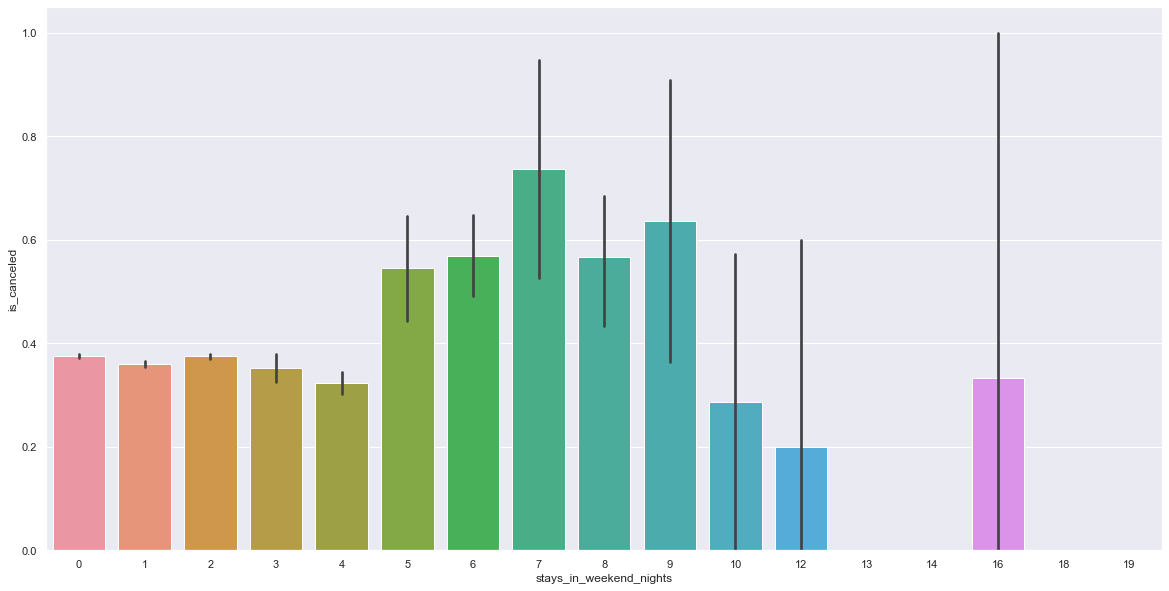

In [21]:
# bar chart for stays on weekend nights
plt.figure(figsize=(20,10))
sns.barplot(x='stays_in_weekend_nights', y='is_canceled', data=hotel)

- The cancellation rates tend to increase as the increase in weekend nights

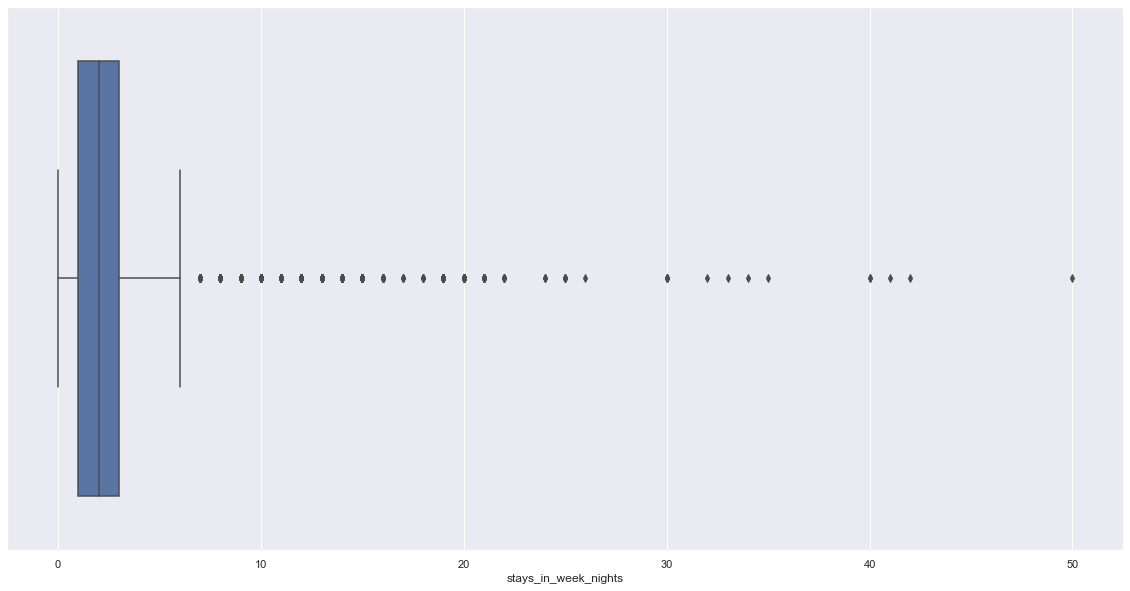

In [22]:
# box plot of stays on week nights
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['stays_in_week_nights'])

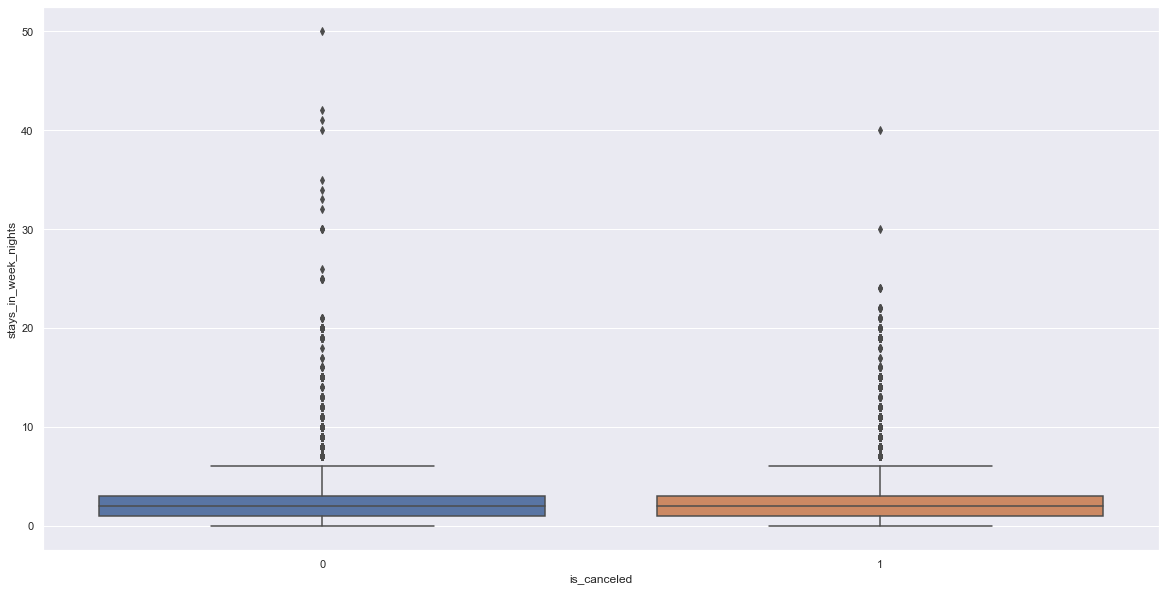

In [23]:
# box plot of stays on weekend nights by is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=hotel['is_canceled'],y=hotel['stays_in_week_nights'])

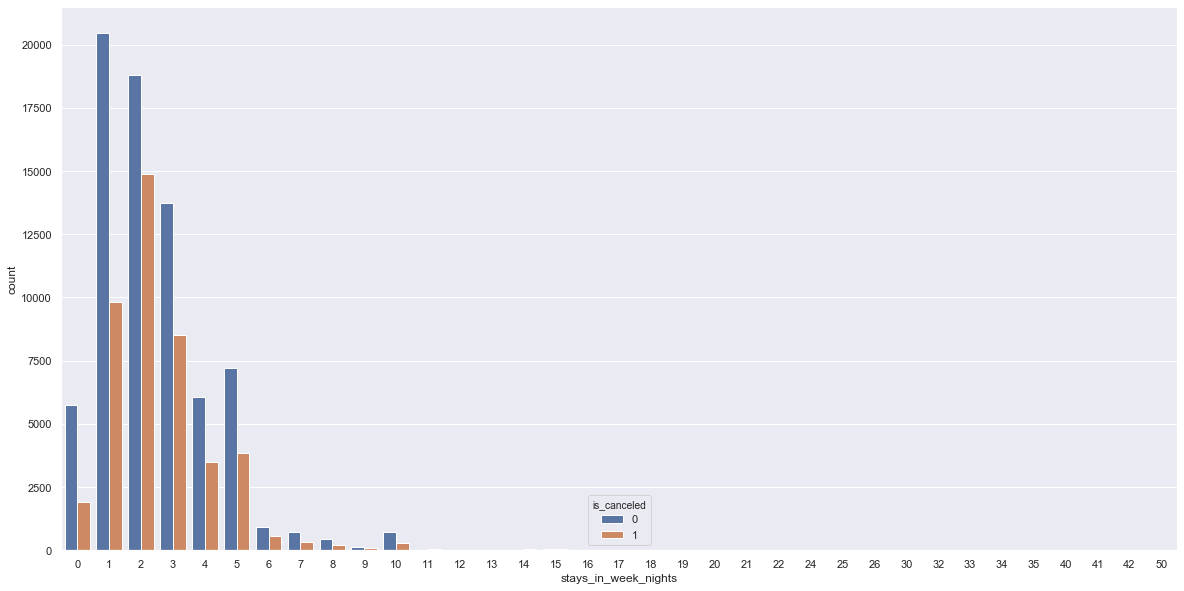

In [24]:
plt.figure(figsize = (20,10))
sns.countplot(x='stays_in_week_nights', hue='is_canceled', data=hotel)

- from the above 3 graphs we can see the majority of people are staying for around 0~5 week nights.

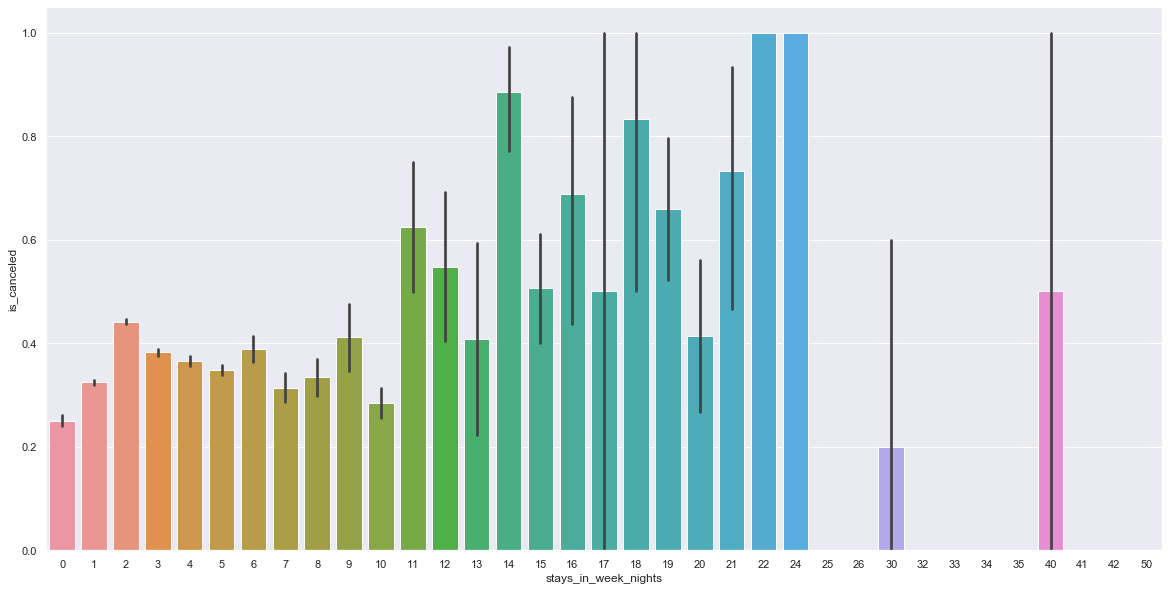

In [25]:
# bar chart for stays on week nights
plt.figure(figsize=(20,10))
sns.barplot(x='stays_in_week_nights', y='is_canceled', data=hotel)

- same as the weekend nights, the longer the weekday nights, the higher chance the reservation will be cancelled

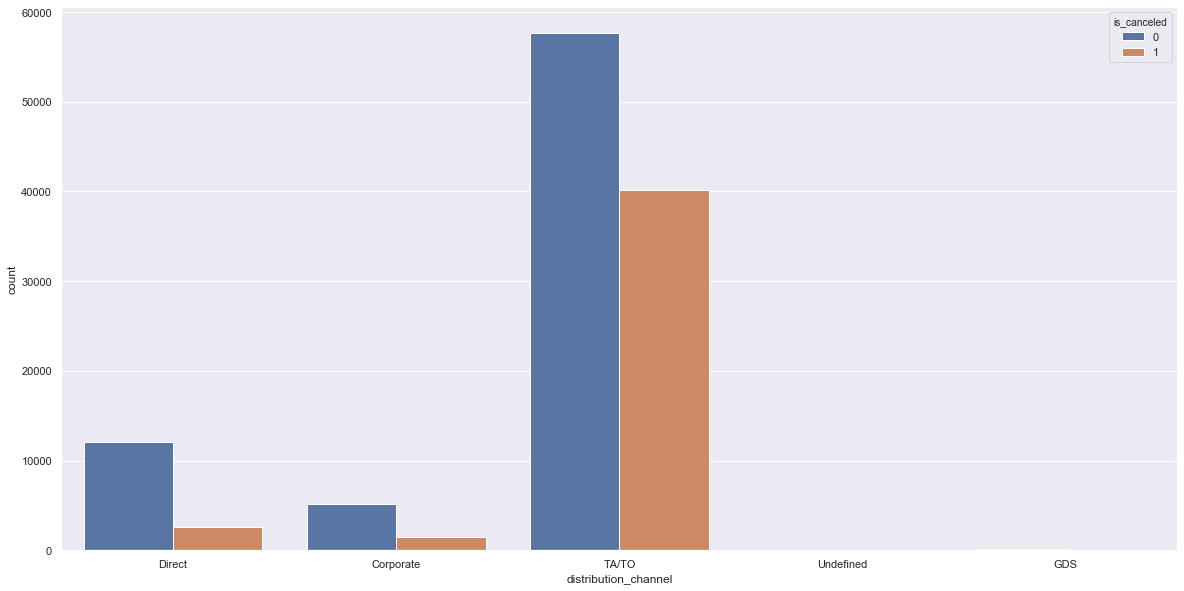

In [26]:
# distribution_channel
plt.figure(figsize = (20,10))
sns.countplot(x='distribution_channel', hue='is_canceled',data=hotel)

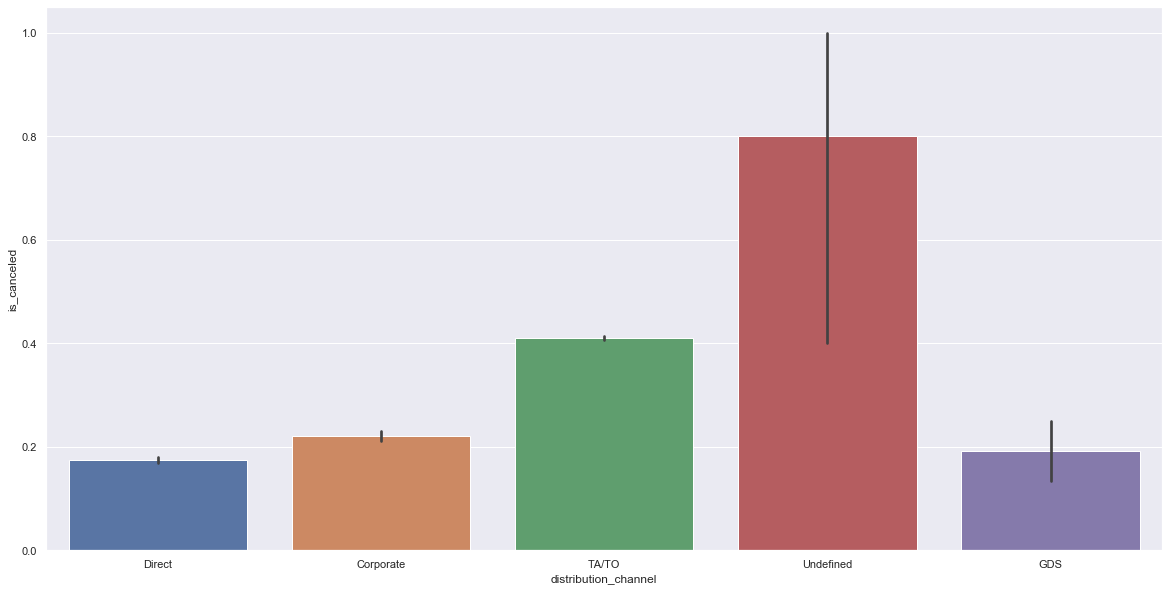

In [27]:
plt.figure(figsize = (20,10))
sns.barplot(x='distribution_channel', y='is_canceled',data=hotel)

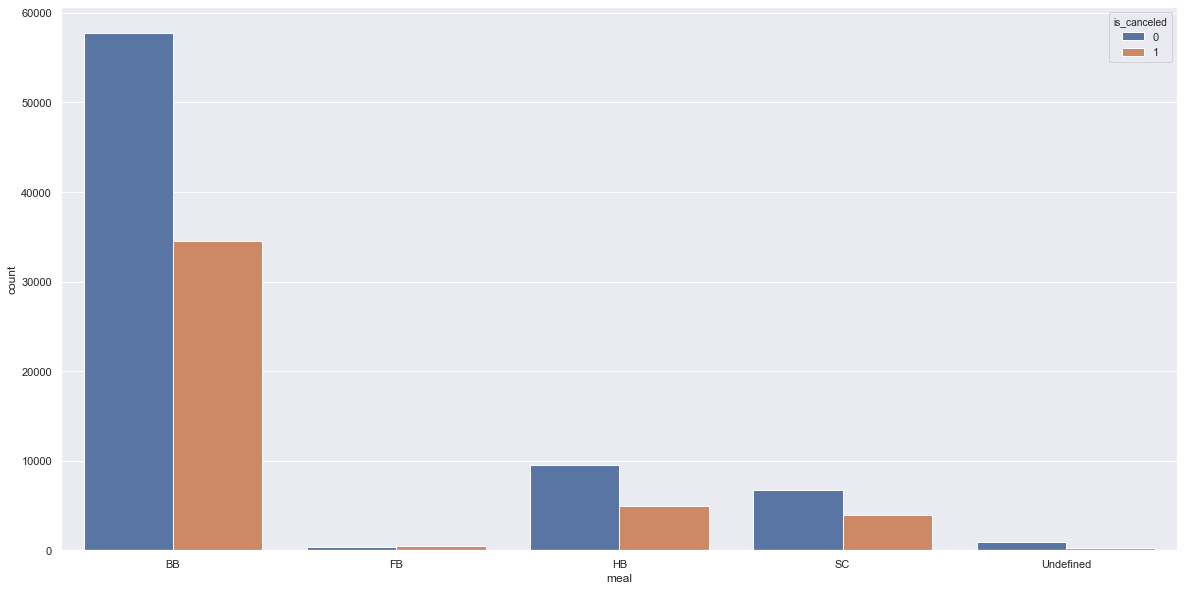

In [28]:
# meal
plt.figure(figsize = (20,10))
sns.countplot(x='meal', hue='is_canceled',data=hotel)

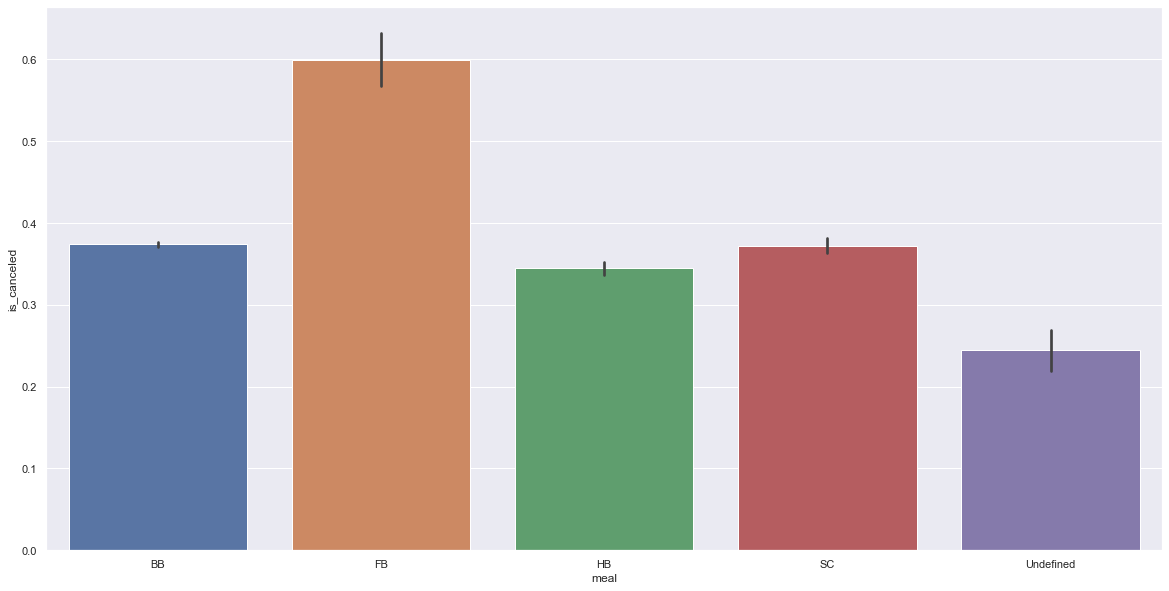

In [29]:
plt.figure(figsize = (20,10))
sns.barplot(x='meal', y='is_canceled',data=hotel)

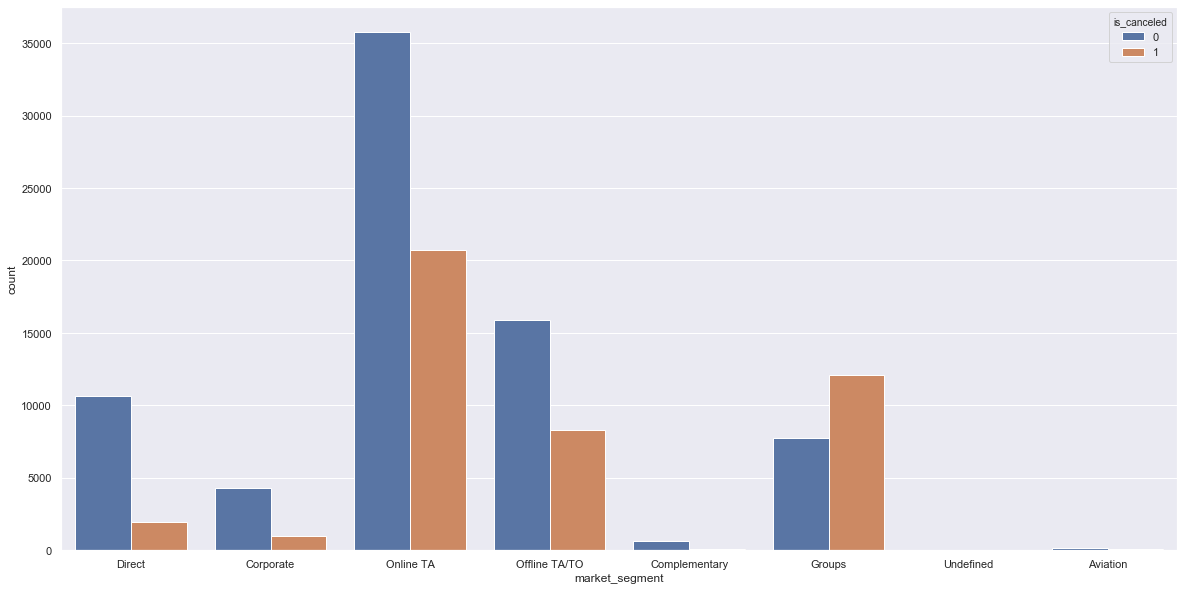

In [30]:
# market_segment
plt.figure(figsize = (20,10))
sns.countplot(x='market_segment', hue='is_canceled',data=hotel)

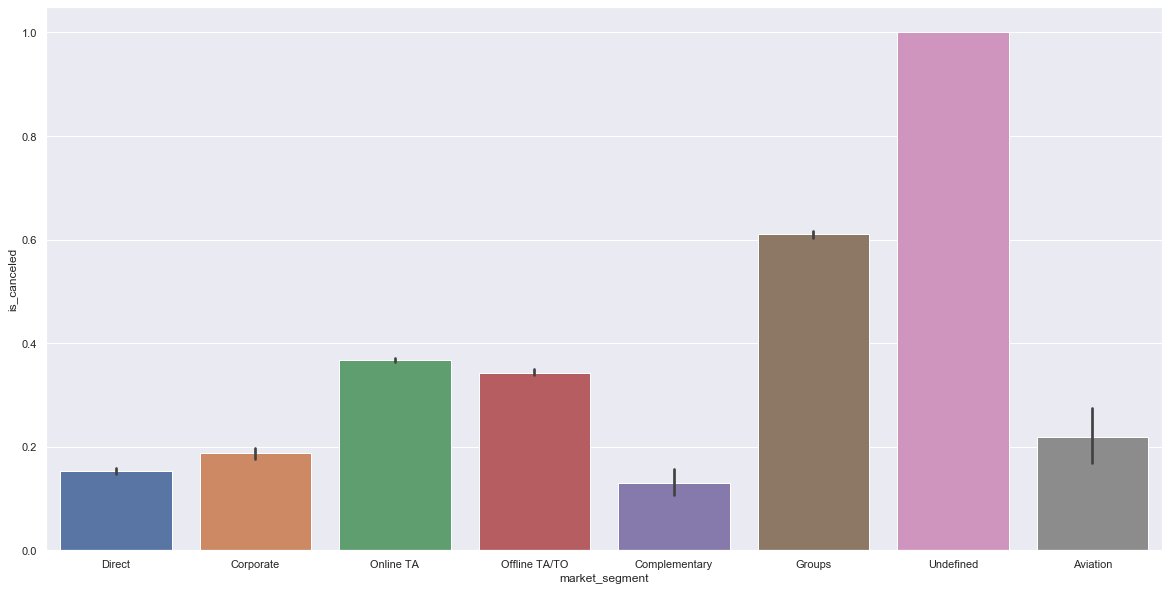

In [31]:
plt.figure(figsize = (20,10))
sns.barplot(x='market_segment', y='is_canceled',data=hotel)

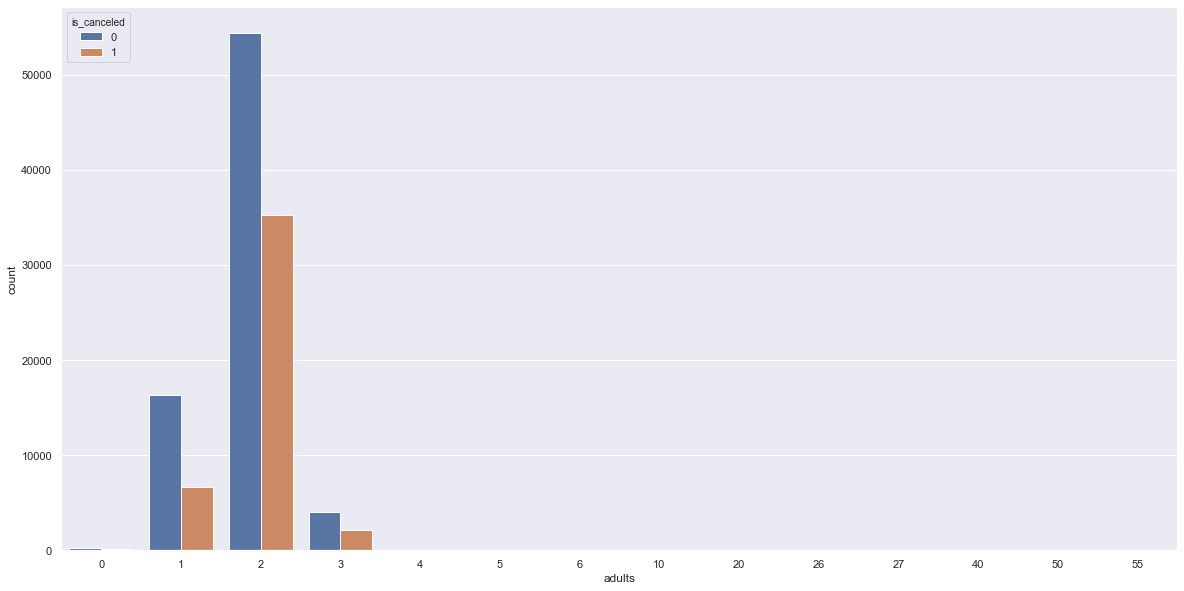

In [32]:
# adults
plt.figure(figsize = (20,10))
sns.countplot(x='adults', hue='is_canceled',data=hotel)

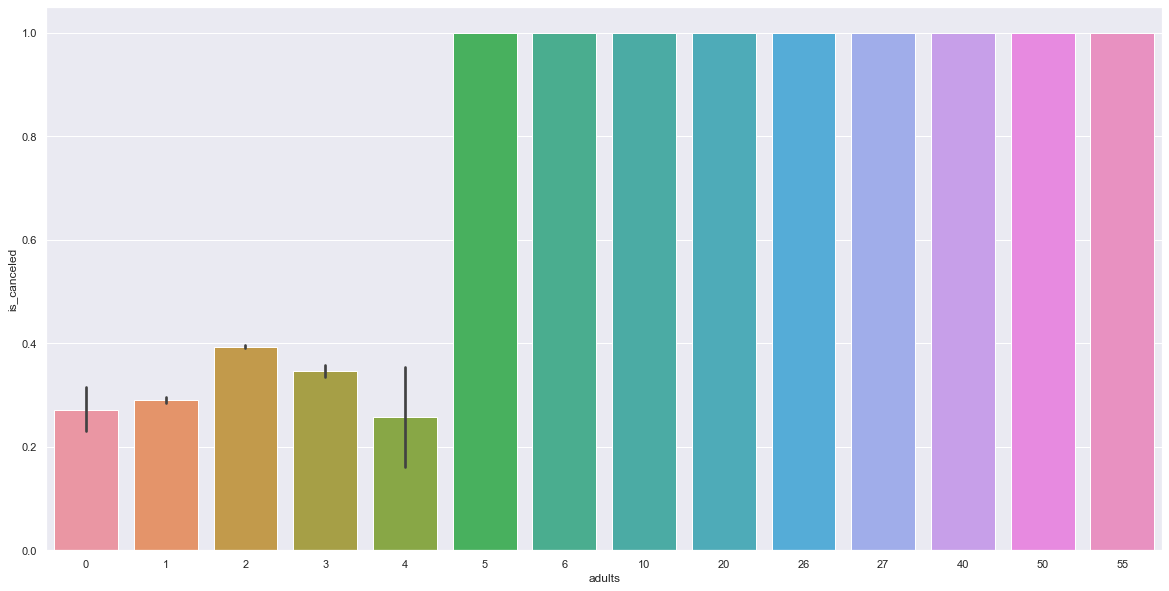

In [33]:
plt.figure(figsize = (20,10))
sns.barplot(x='adults', y='is_canceled',data=hotel)

- when the number of adults is 5 or above, the cancellation rate is 1.

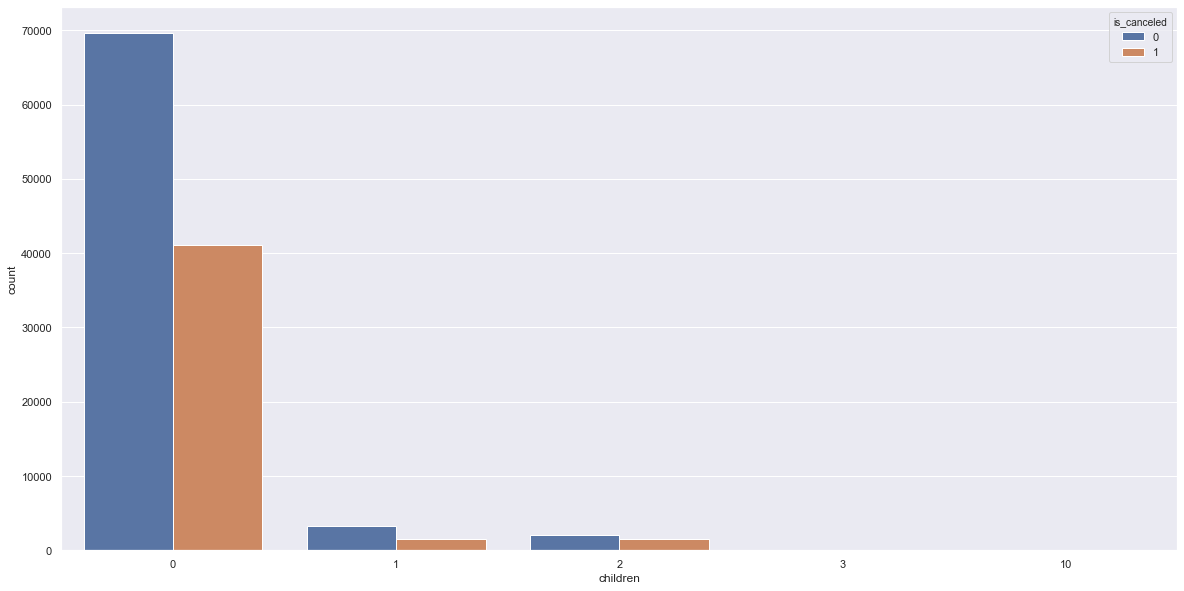

In [34]:
# children
plt.figure(figsize = (20,10))
sns.countplot(x='children', hue='is_canceled',data=hotel)

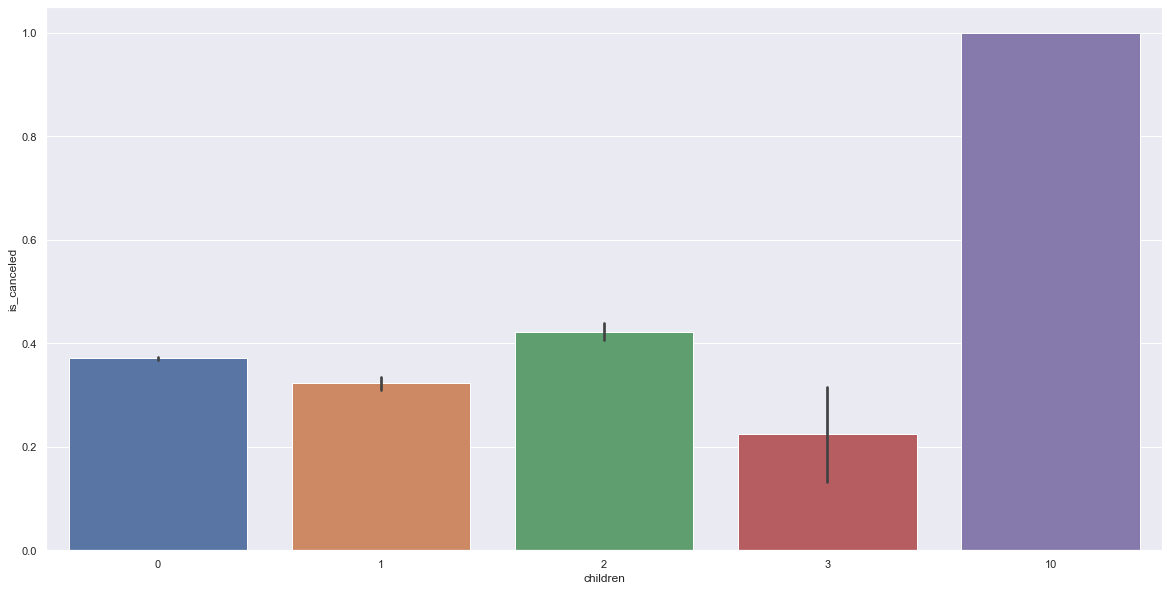

In [35]:
plt.figure(figsize = (20,10))
sns.barplot(x='children', y='is_canceled',data=hotel)

- when the number of children is 10, the reservation will be canceled

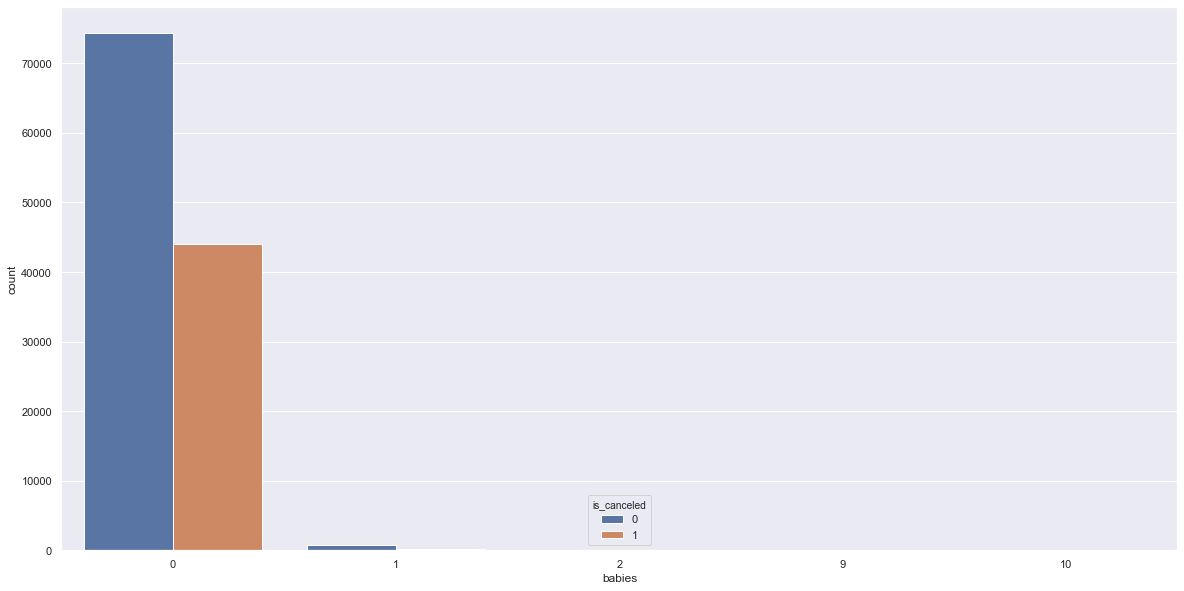

In [36]:
# babies
plt.figure(figsize = (20,10))
sns.countplot(x='babies', hue='is_canceled',data=hotel)

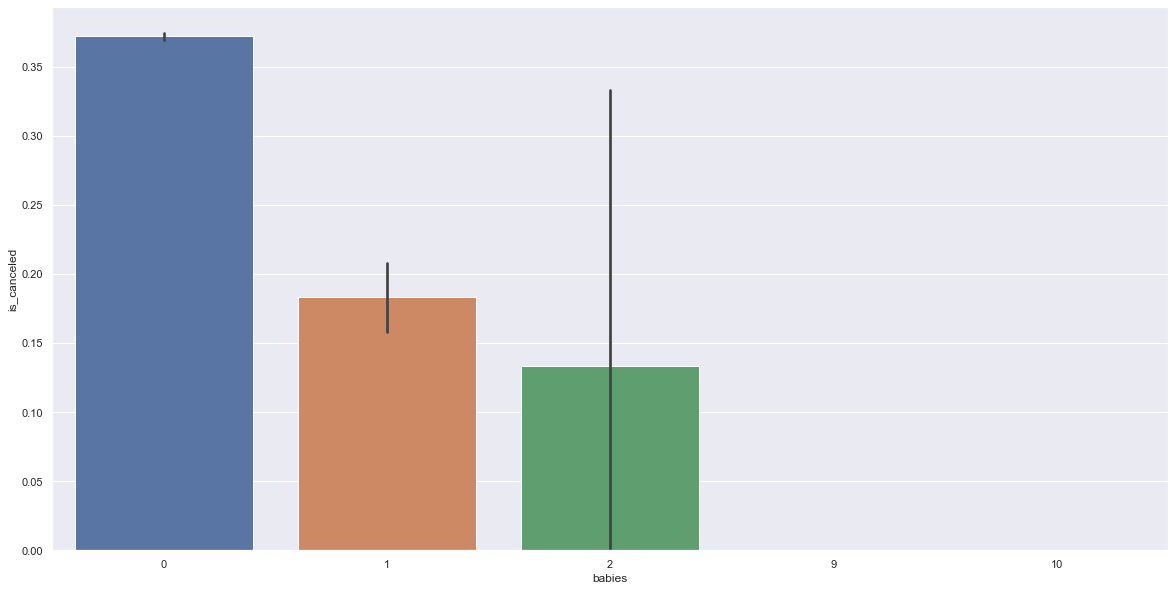

In [37]:
plt.figure(figsize = (20,10))
sns.barplot(x='babies', y='is_canceled',data=hotel)

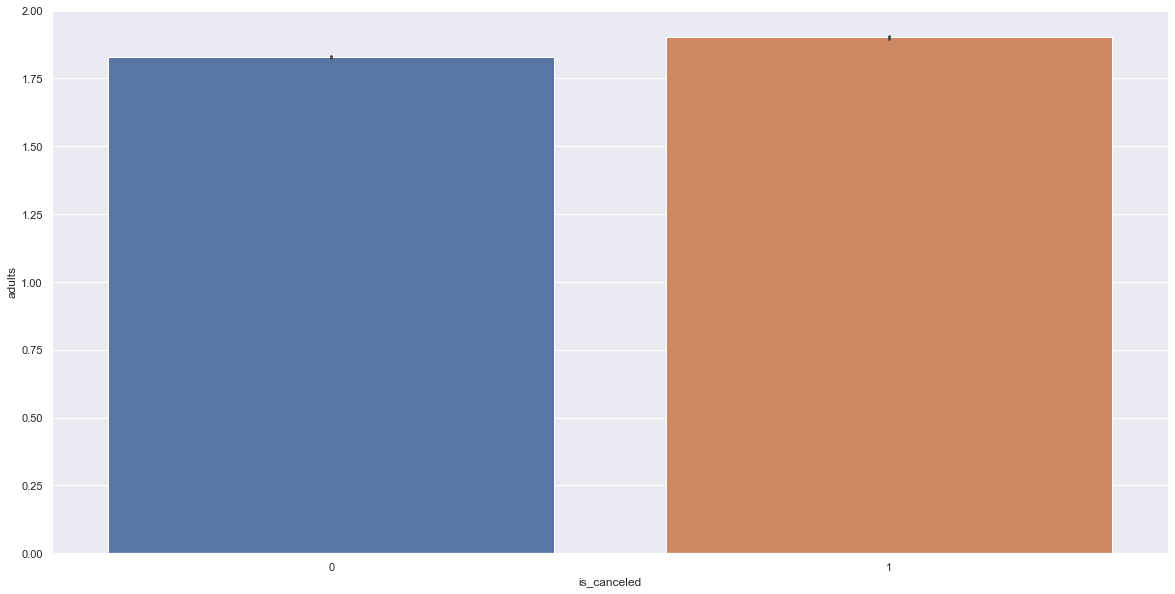

In [38]:
plt.figure(figsize = (20,10))
sns.barplot(x='is_canceled', y='adults', data = hotel)

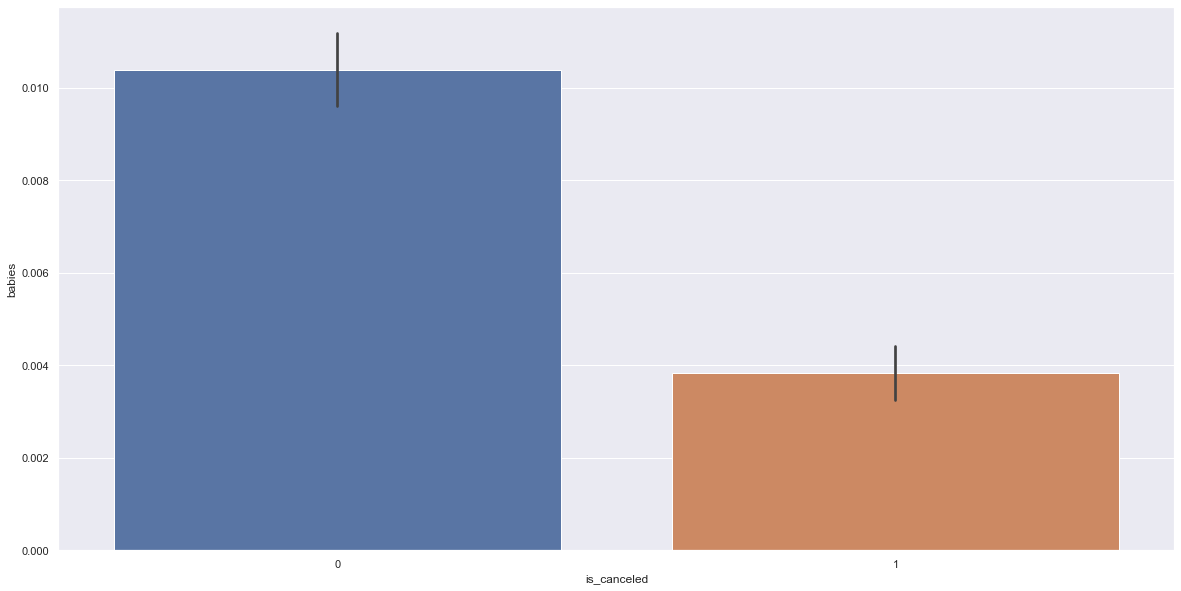

In [39]:
plt.figure(figsize = (20,10))
sns.barplot(x='is_canceled', y='babies', data=hotel)

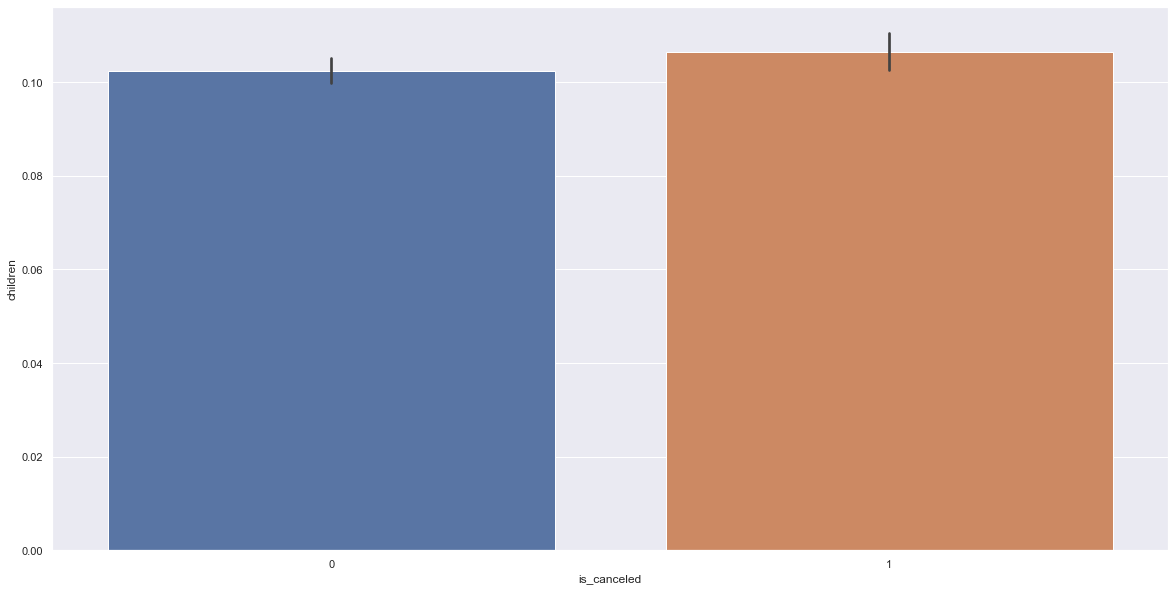

In [40]:
plt.figure(figsize = (20,10))
sns.barplot(x='is_canceled', y='children', data=hotel)

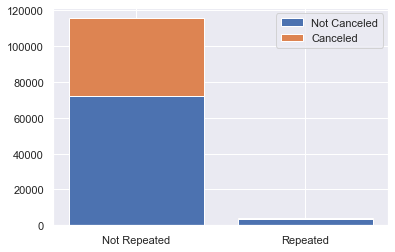

In [41]:
# Stacked Bar chart for is_repeated_guest
canceled = hotel[hotel.is_canceled==1]['is_repeated_guest'].value_counts()
not_canceled = hotel[hotel.is_canceled==0]['is_repeated_guest'].value_counts()

labels = ['Not Repeated', 'Repeated']
fig, ax = plt.subplots()
ax.bar(labels, not_canceled, label='Not Canceled')
ax.bar(labels, canceled, bottom=not_canceled, label='Canceled')

ax.legend()
plt.show()

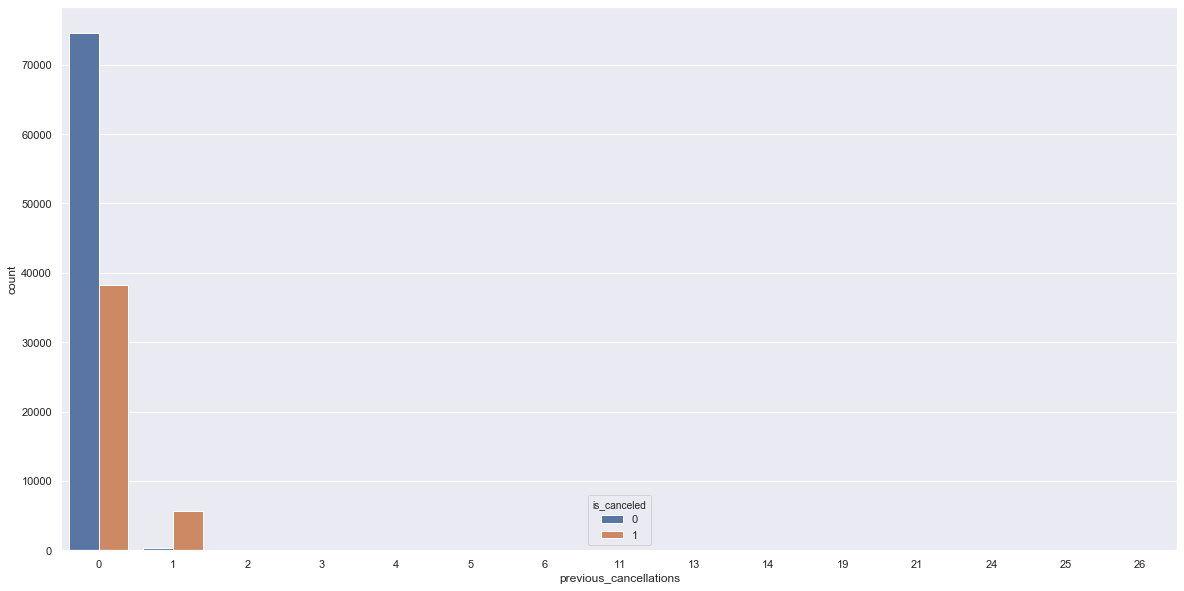

In [42]:
# previous_cancellations
plt.figure(figsize = (20,10))
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)

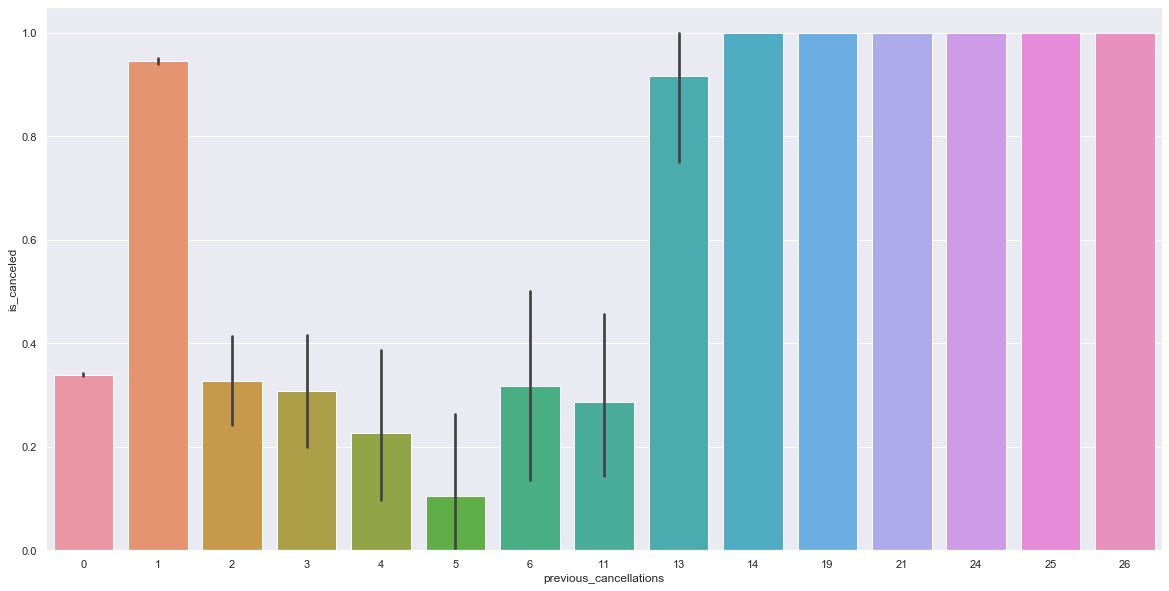

In [43]:
plt.figure(figsize = (20,10))
sns.barplot(x='previous_cancellations', y='is_canceled', data=hotel)

- when there are previous cancellations, the reservation is likely to be canceled this time

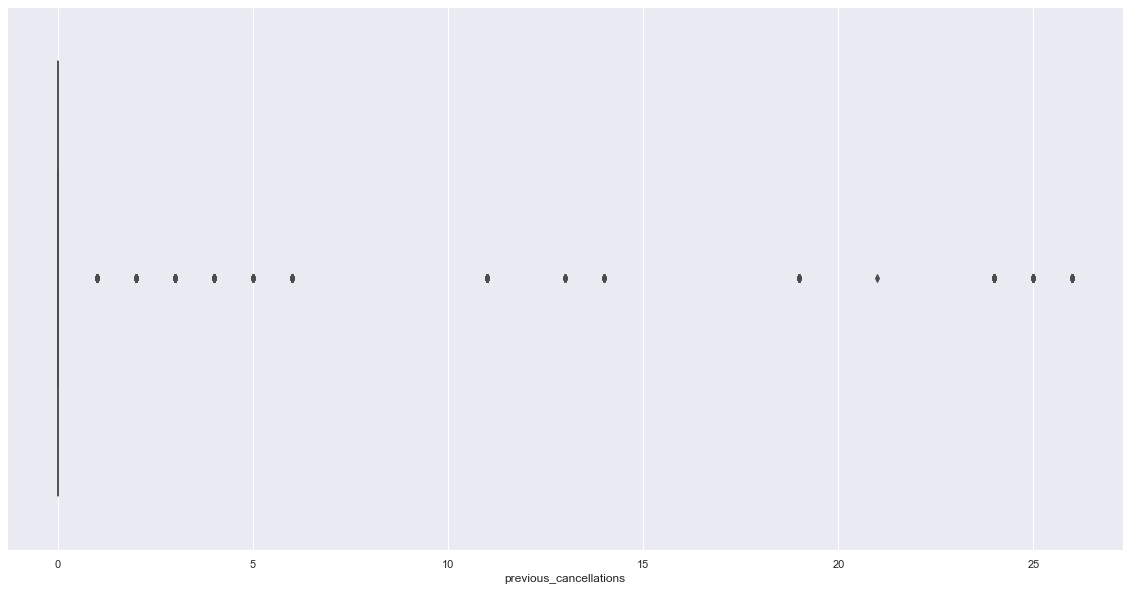

In [44]:
plt.figure(figsize = (20,10))
sns.boxplot(x='previous_cancellations',data=hotel)

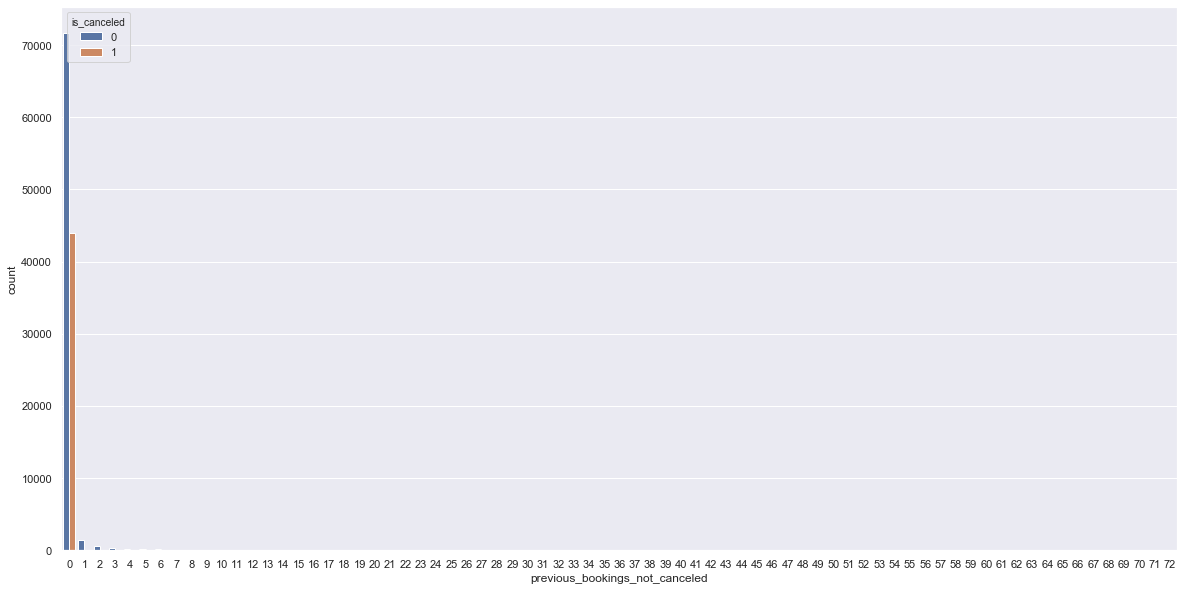

In [45]:
# previous_bookings_not_canceled
plt.figure(figsize = (20,10))
sns.countplot(x='previous_bookings_not_canceled', hue='is_canceled', data=hotel)

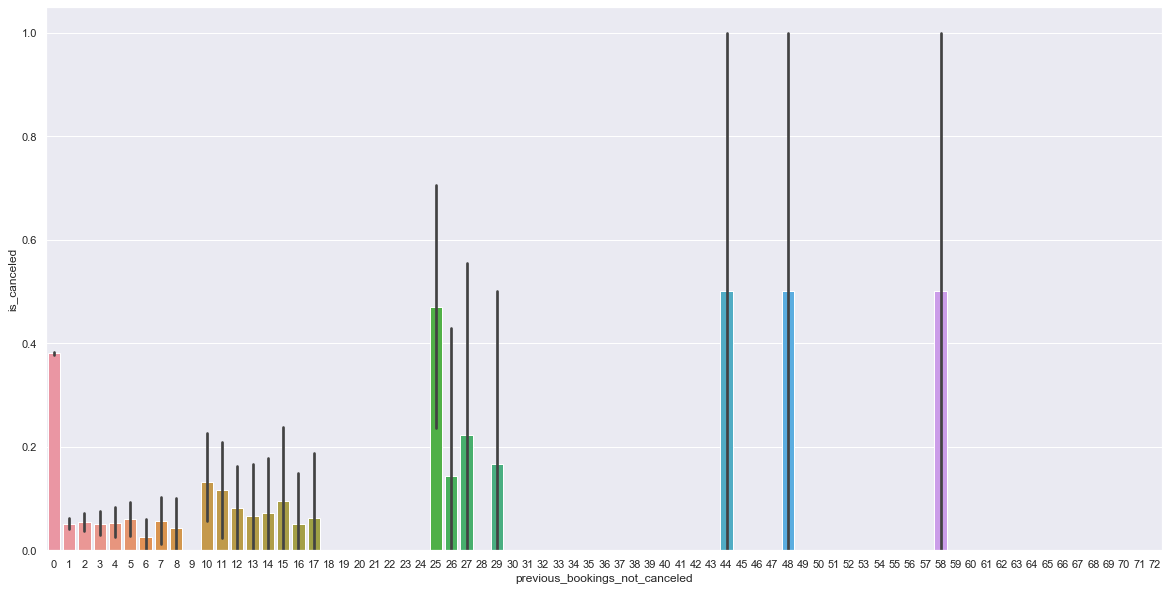

In [46]:
plt.figure(figsize = (20,10))
sns.barplot(x='previous_bookings_not_canceled', y='is_canceled', data=hotel)

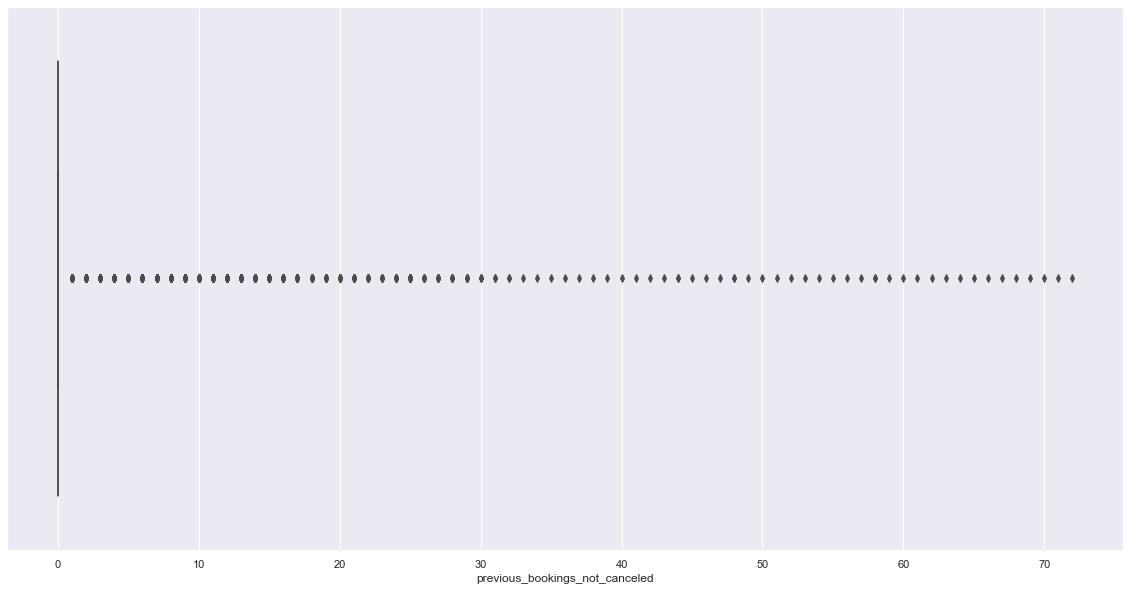

In [47]:
plt.figure(figsize = (20,10))
sns.boxplot(x='previous_bookings_not_canceled',data=hotel)

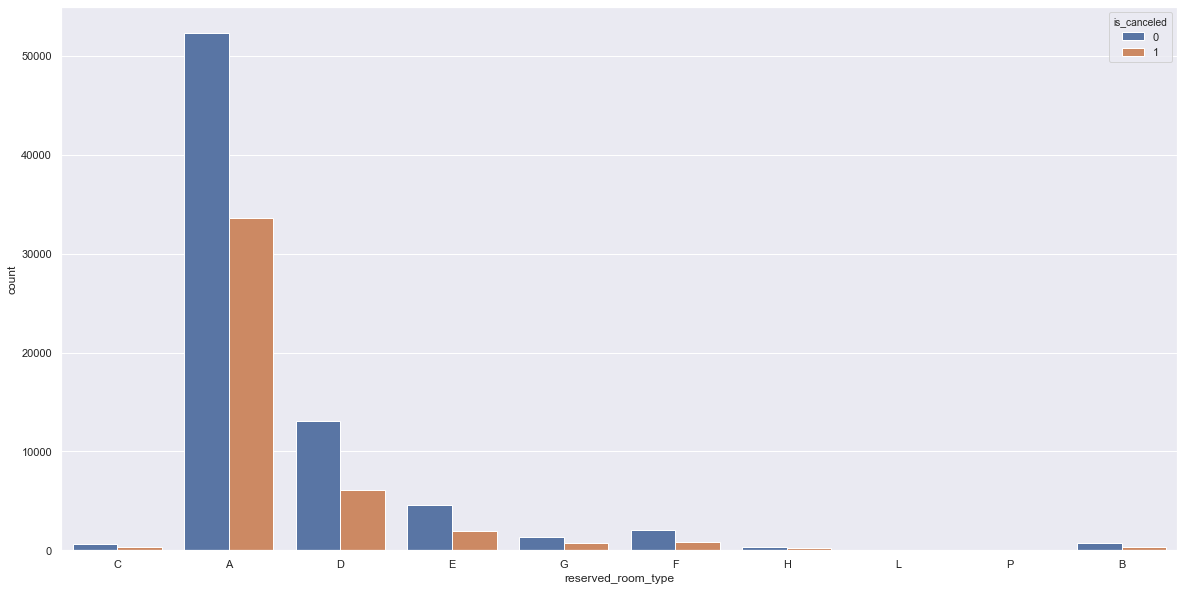

In [48]:
# reserved_room_type
plt.figure(figsize = (20,10))
sns.countplot(x='reserved_room_type',hue='is_canceled',data=hotel)

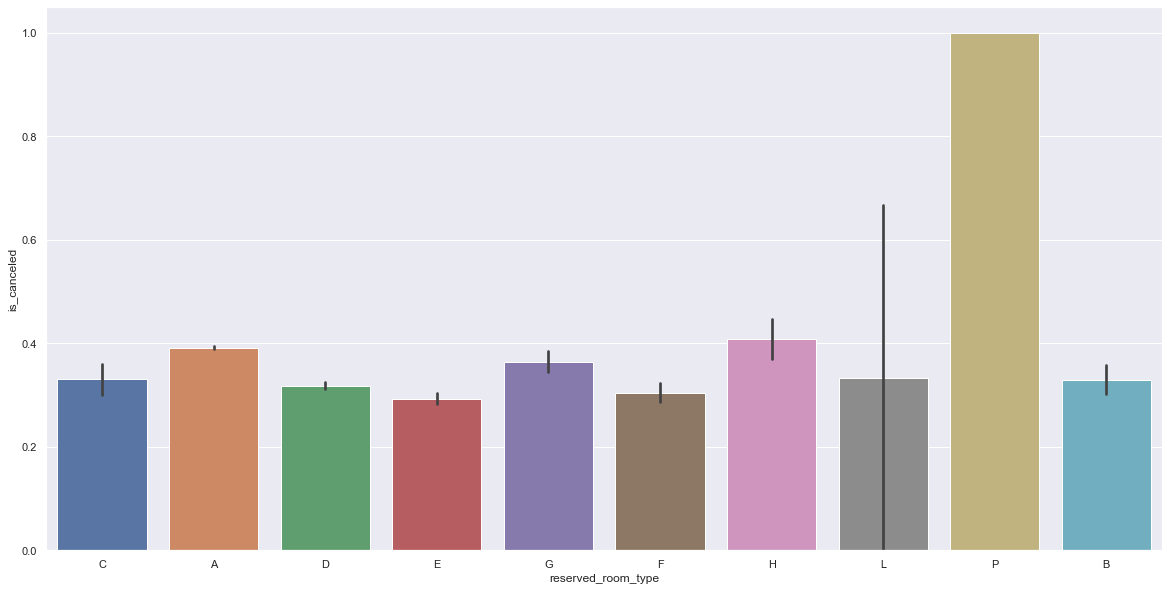

In [49]:
plt.figure(figsize = (20,10))
sns.barplot(x='reserved_room_type',y='is_canceled',data=hotel)

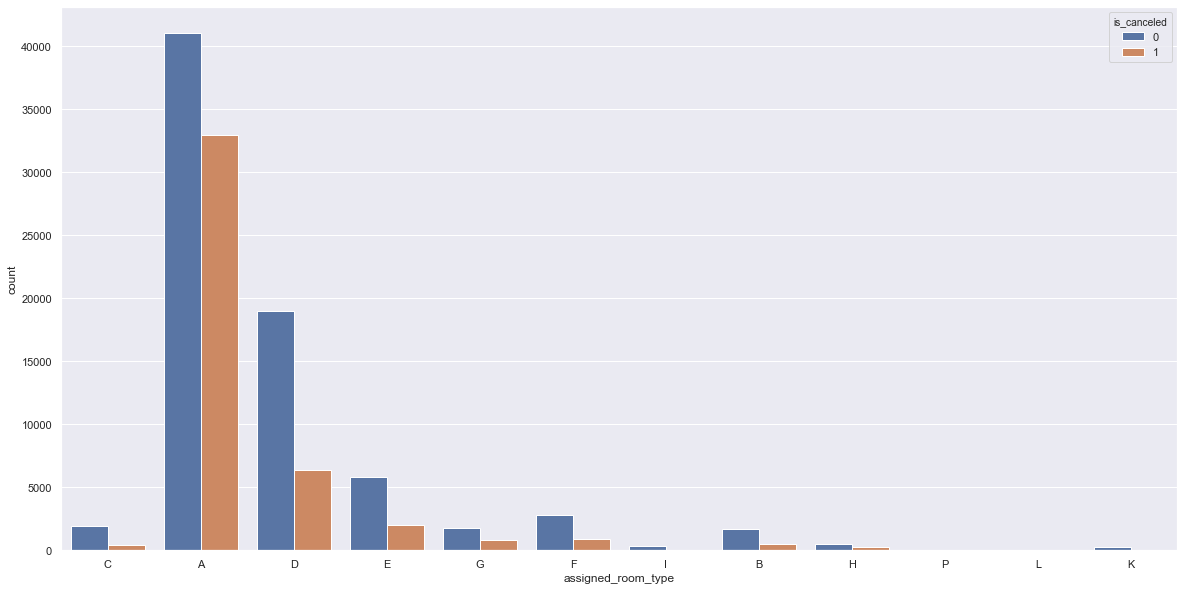

In [50]:
# assigned_room_type
plt.figure(figsize = (20,10))
sns.countplot(x='assigned_room_type',hue='is_canceled',data=hotel)

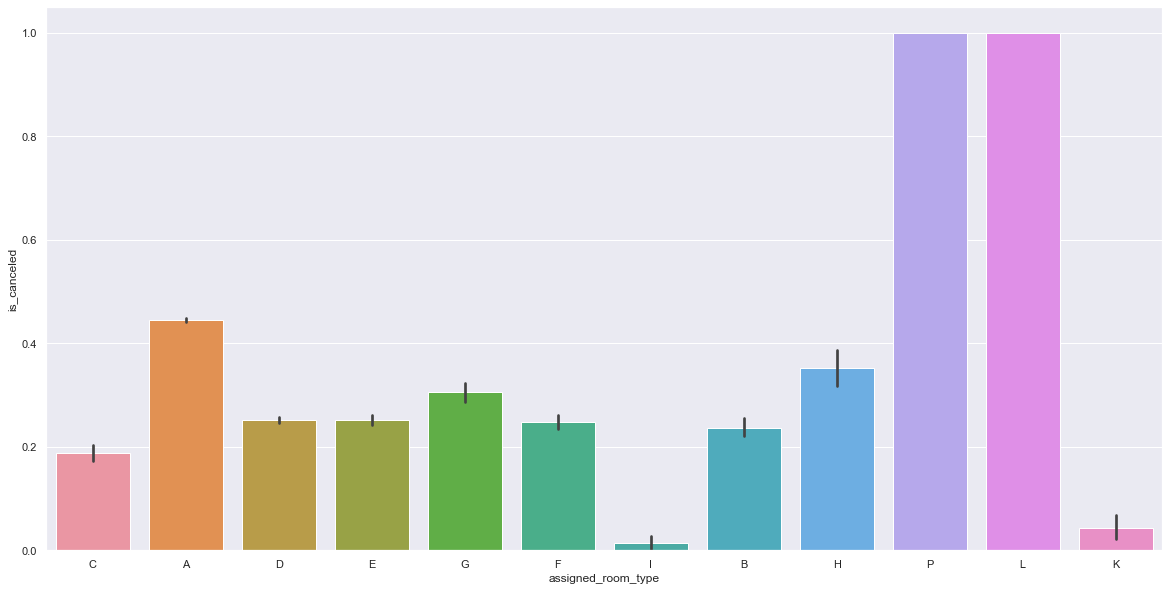

In [51]:
plt.figure(figsize = (20,10))
sns.barplot(x='assigned_room_type',y='is_canceled',data=hotel)

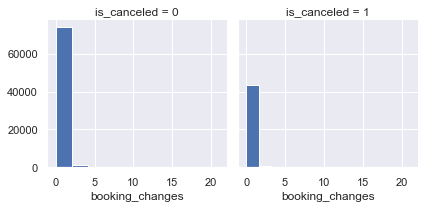

In [52]:
# booking_changes
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'booking_changes')

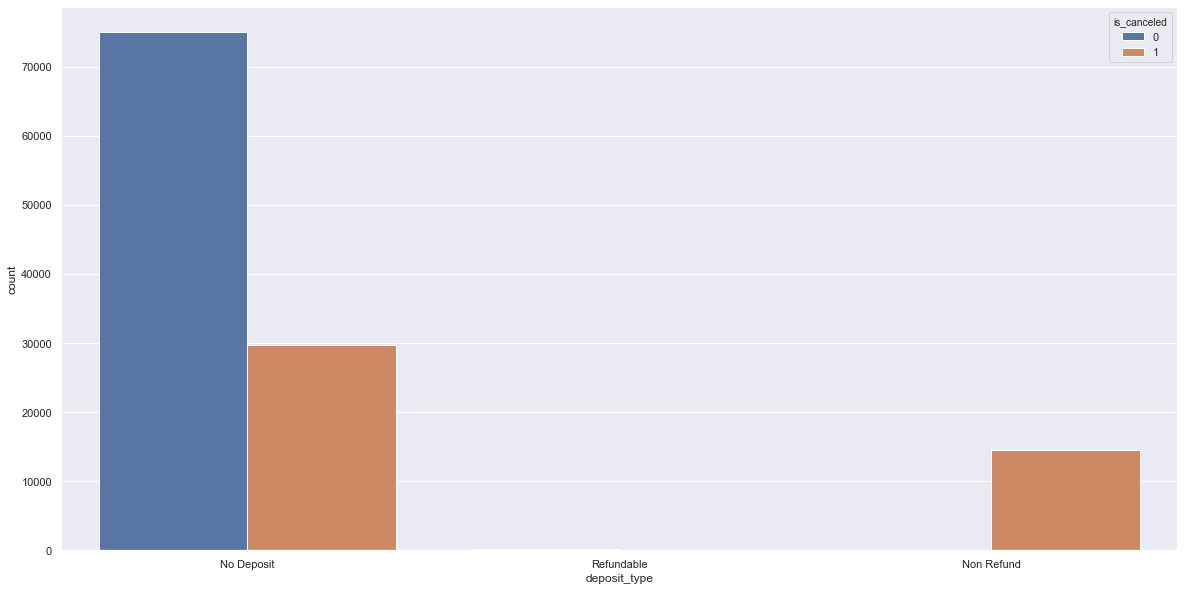

In [53]:
# deposit_type
plt.figure(figsize = (20,10))
sns.countplot(x='deposit_type',hue='is_canceled',data=hotel)

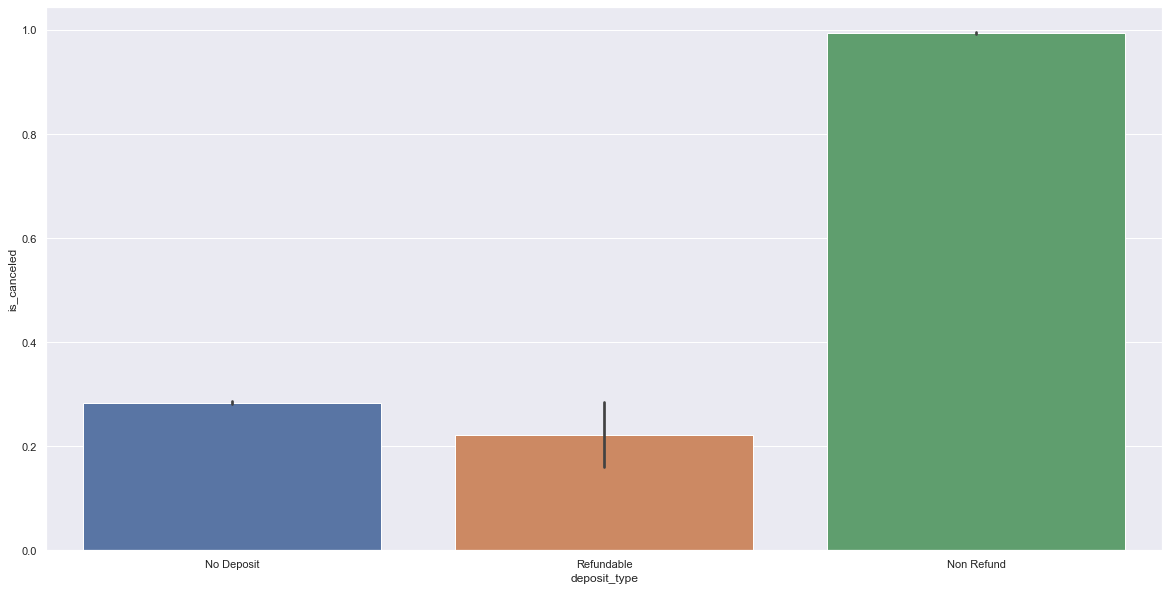

In [55]:
plt.figure(figsize = (20,10))
sns.barplot(x='deposit_type',y='is_canceled',data=hotel)

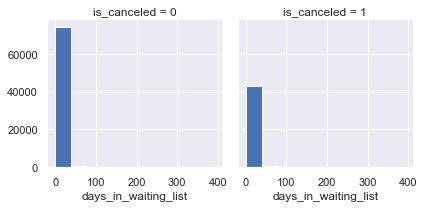

In [56]:
# days_in_waiting_list
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'days_in_waiting_list')

- seems that in the is_canceled=1 group, a larger proportion of people have longer days_in_waiting_list

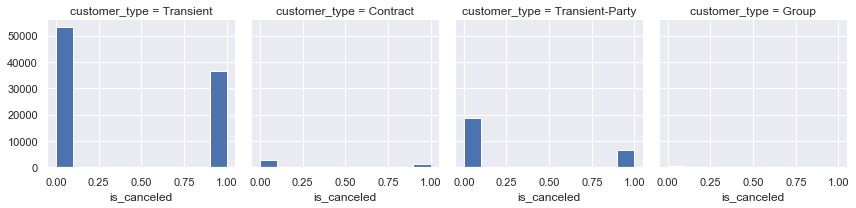

In [57]:
# customer_type
g = sns.FacetGrid(hotel, col='customer_type', margin_titles=True)
g.map(plt.hist,'is_canceled')

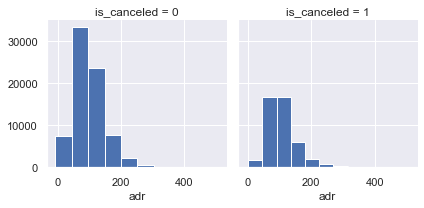

In [58]:
# adr
hotel['adr'].describe()
mean_adr=hotel['adr'].mean()
std_adr=hotel['adr'].std()
a = np.array(hotel['adr'].values.tolist())
hotel['adr'] = np.where(a > (mean_adr+10*std_adr), mean_adr, a).tolist() # delete outlier
hotel['adr'].describe()
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'adr')

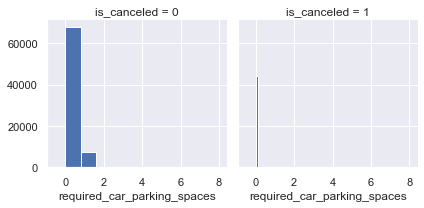

In [59]:
# required_car_parking_spaces
hotel['required_car_parking_spaces'].describe()
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'required_car_parking_spaces')

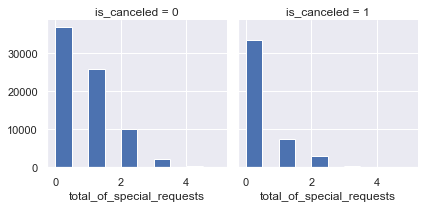

In [60]:
# total_of_special_requests
hotel['total_of_special_requests'].describe()
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'total_of_special_requests')

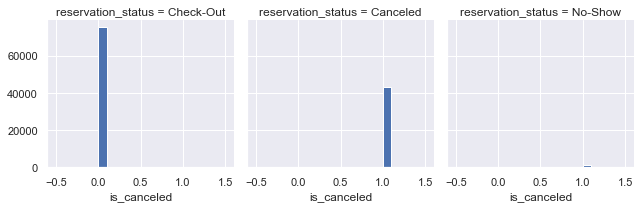

In [61]:
# for reservation_status
g = sns.FacetGrid(hotel, col='reservation_status', margin_titles=True)
g.map(plt.hist,'is_canceled')

- This feature is not good, so as reservation_status_date

- `arrival_date_week_number` is highly related to `arrival_date_month`, we drop it
- `arrival_date_day_of_month` seems to be random number, we drop it
- it is not meaningful to train the model based on previous years, we drop `arrival_date_year`
- since there are too many missing values in `company`, we will drop the column
- `reservation_status` and `reservation_status_date` reveals the same thing as the label, we will drop them

In [62]:
col = ['arrival_date_week_number',
       'arrival_date_day_of_month',
       'arrival_date_year',
       'company',
       'reservation_status',
       'reservation_status_date']

hotel_drop = hotel.drop(columns=col)
hotel_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_month                119390 non-null object
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null int64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 no

In [63]:
# save the database to a new csv file for later use
hotel_drop.to_csv("hotel_bookings_no_missing.csv")